## Before you start change the runtime type. From the menu go to Runtime -> Change Runtime Type -> T4 GPU


In [ ]:
!pip install -q supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 7.8 MB/s eta 0:00:00


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 16.9 MB/s eta 0:00:00


In [ ]:
!mkdir -p {HOME}/weights

In [ ]:
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt

The code snippet you see under is downloaded version of trained model

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="f8EdVy340Bro3aZYHkyr")
project = rf.workspace("dataset-jtrj2").project("odqa-high-quality-images")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Odqa(high-quality-images)-1 in yolov8:: 100%|██████████| 462/462 [00:00<00:00, 7489.31it/s]


After the model is downloaded for you environment should do the following
1. Double click the data.yaml file
2. You will see the following in the last lines
test: ../test/images
train: ../train/images
val: ../valid/images
You have to change the values for all of them and set actual path
3. Save the file



For the code below you should put the path to the data.yaml for the data variable

In [ ]:
%cd /content

!yolo task=detect mode=train epochs=25 batch=8 plots=True model=/content/weights/yolov10n.pt data=/content/Odqa\(high-quality-images\)-1/data.yaml


/content
New https://pypi.org/project/ultralytics/8.2.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10n.pt, data=/content/Odqa(high-quality-images)-1/data.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, clas

/content


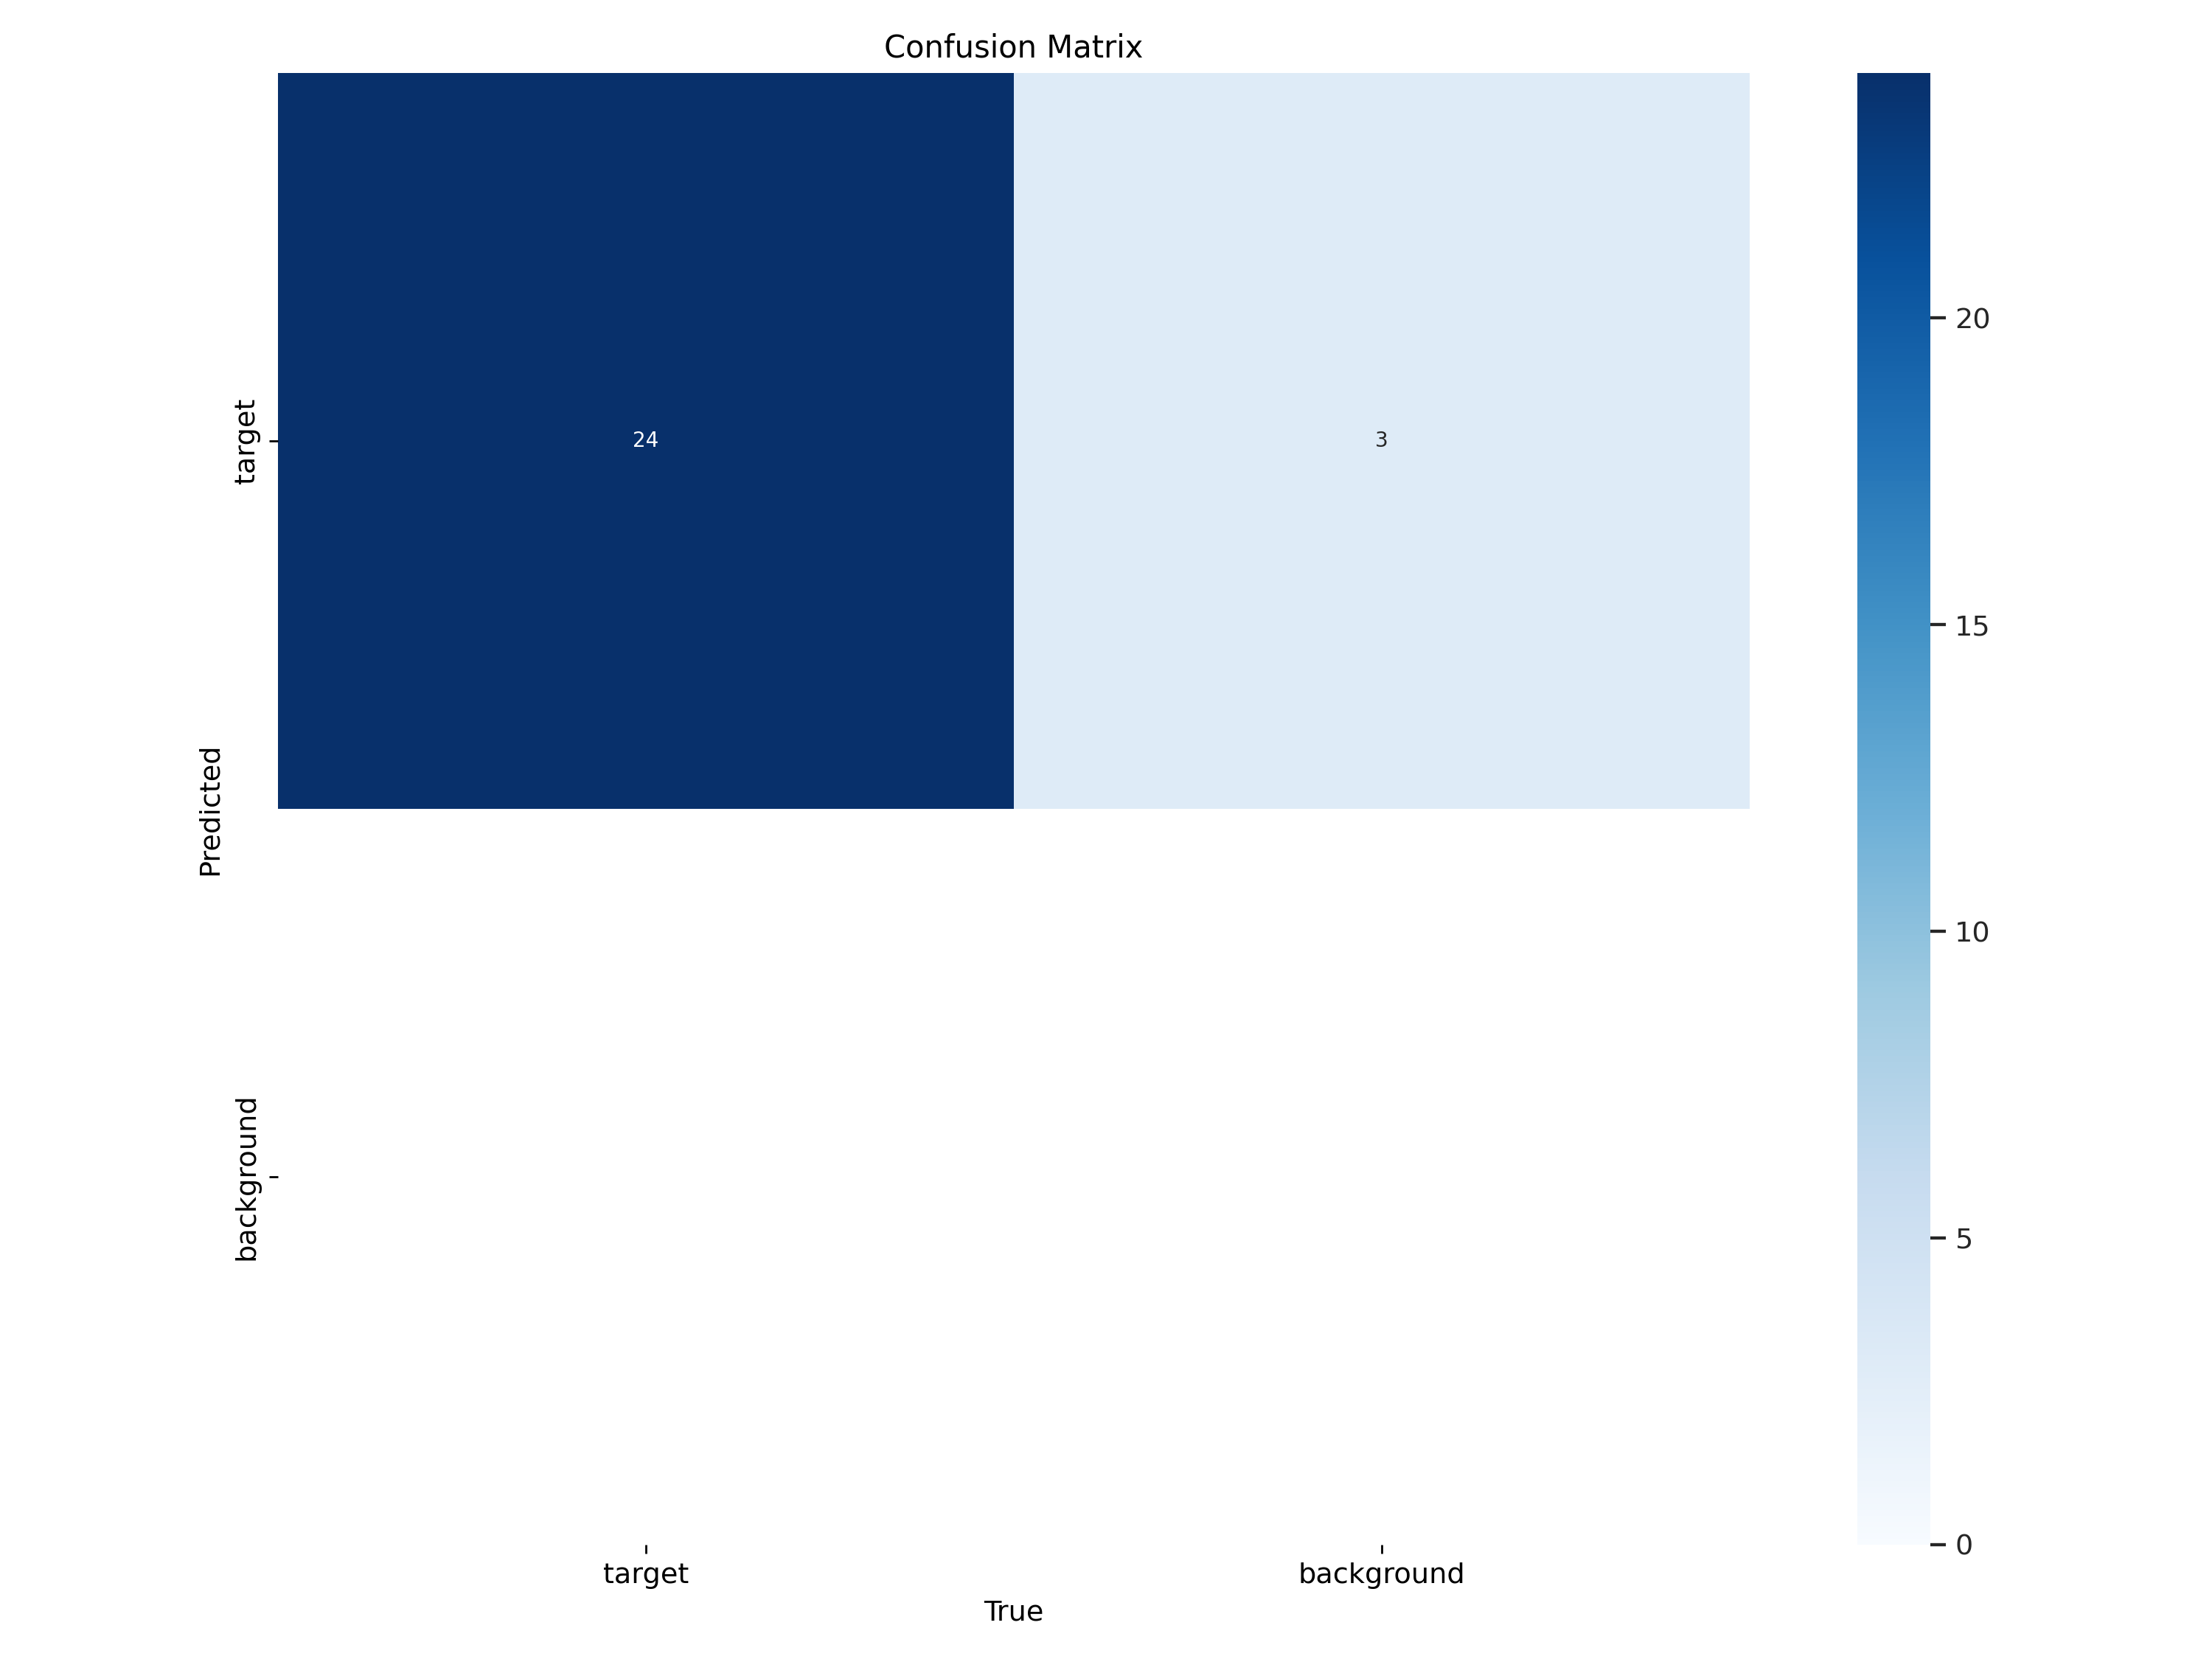

In [ ]:
from IPython.display import Image
%cd {HOME}
Image(filename='/content/runs/detect/train2/confusion_matrix.png', width=600)

/content


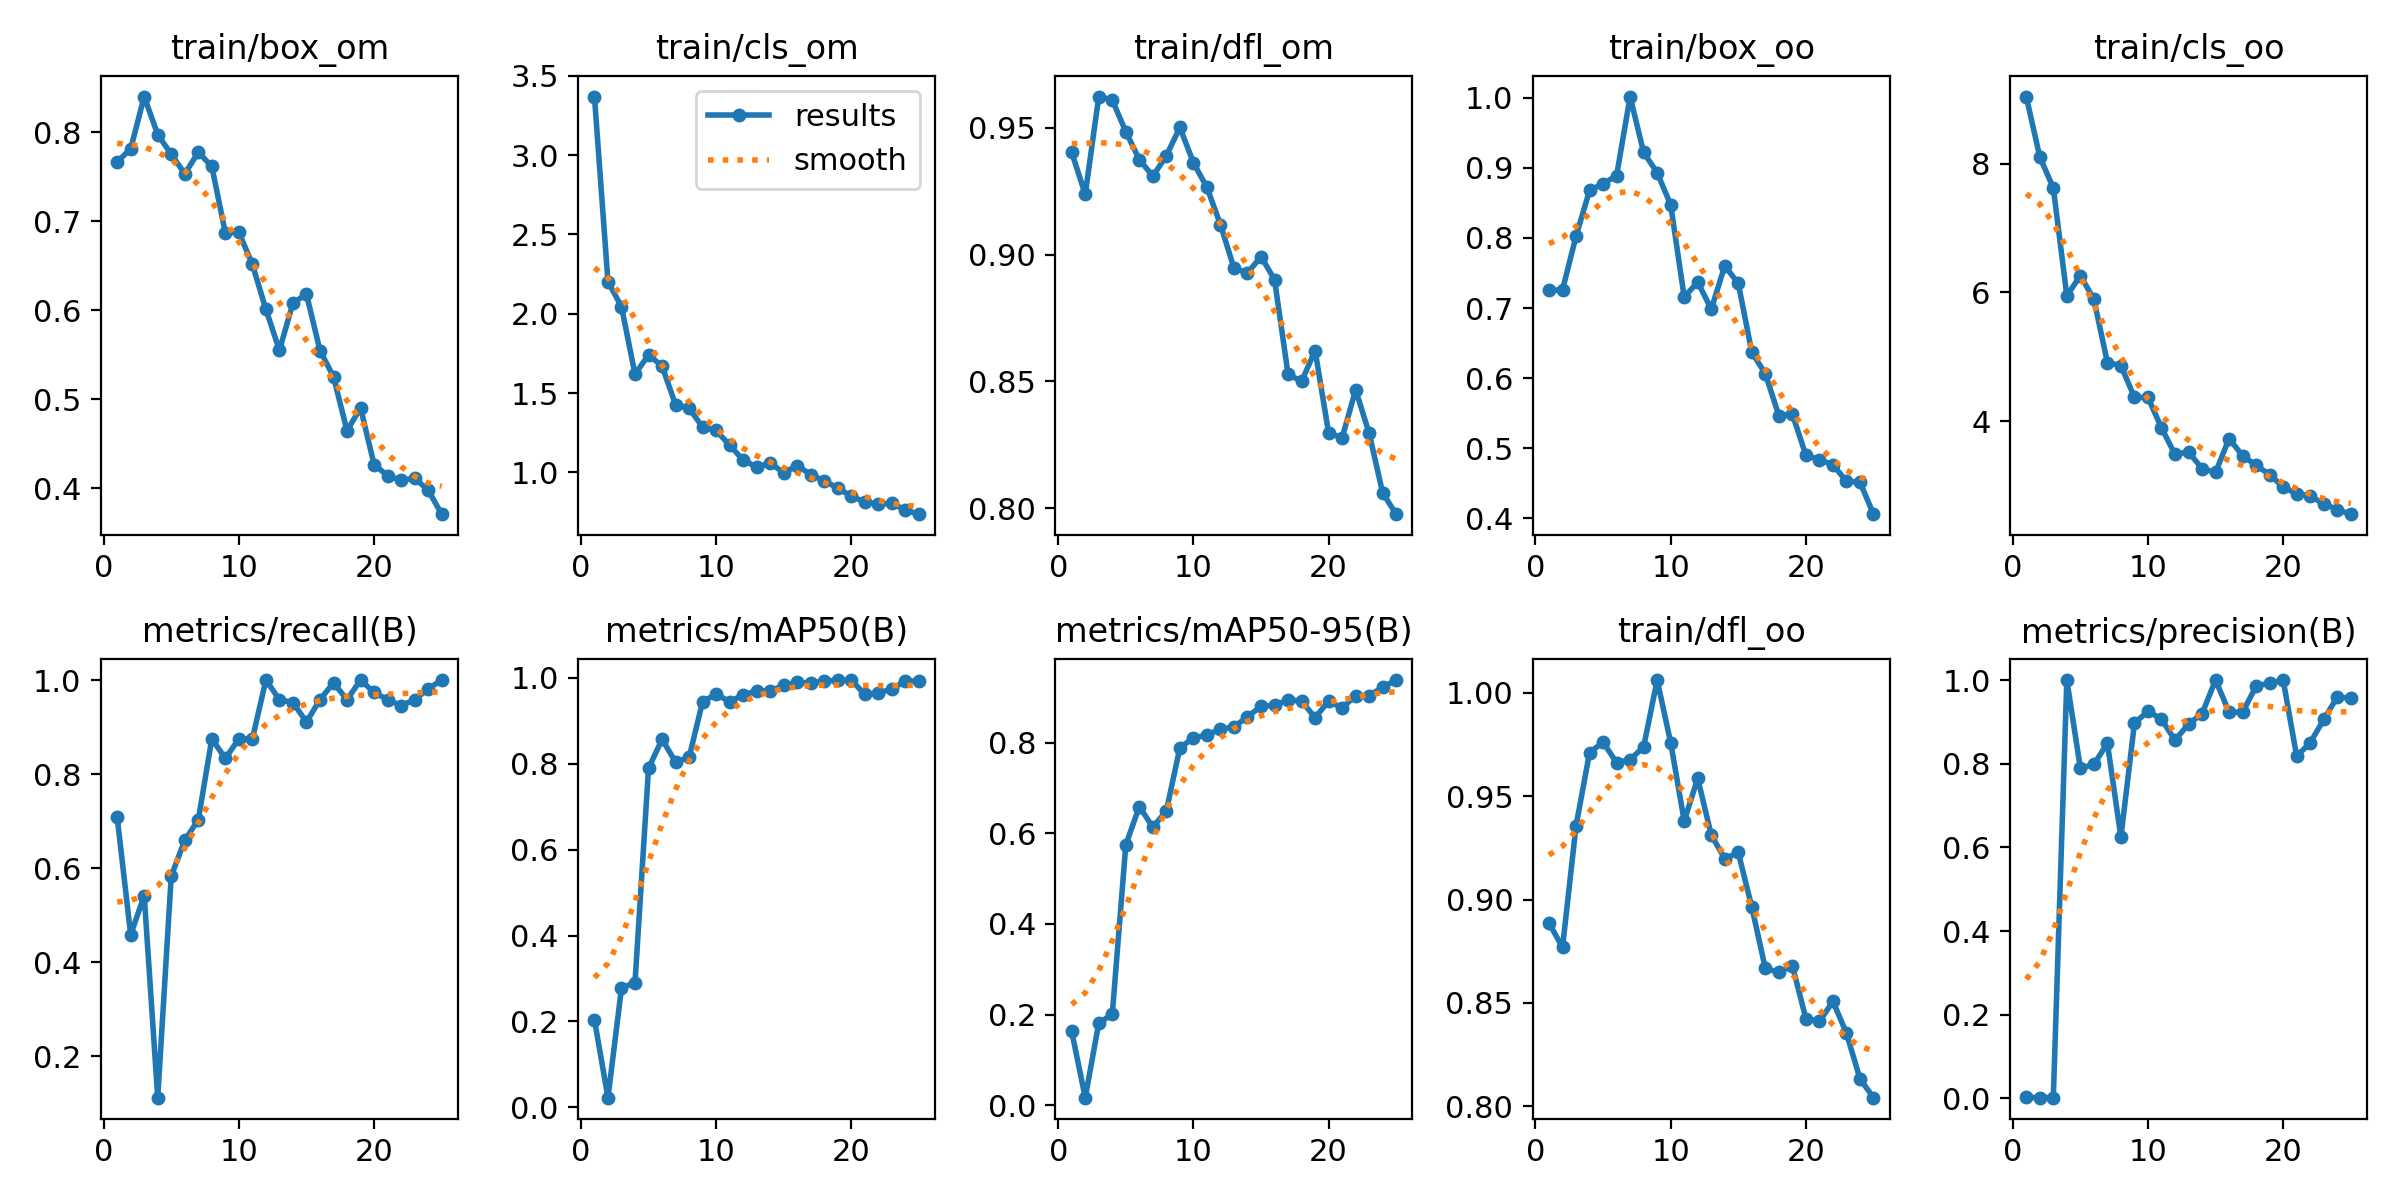

In [ ]:
from IPython.display import Image
%cd {HOME}
Image(filename='/content/runs/detect/train2/results.png', width=600)

In [ ]:
from ultralytics import YOLOv10
import supervision as sv

model = YOLOv10('/content/runs/detect/train2/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path="/content/Odqa(high-quality-images)-1/valid/images",
    annotations_directory_path="/content/Odqa(high-quality-images)-1/valid/labels",
    data_yaml_path="/content/Odqa(high-quality-images)-1/data.yaml"
)

bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.



0: 640x640 1 target, 16.4ms
Speed: 3.8ms preprocess, 16.4ms inference, 203.0ms postprocess per image at shape (1, 3, 640, 640)


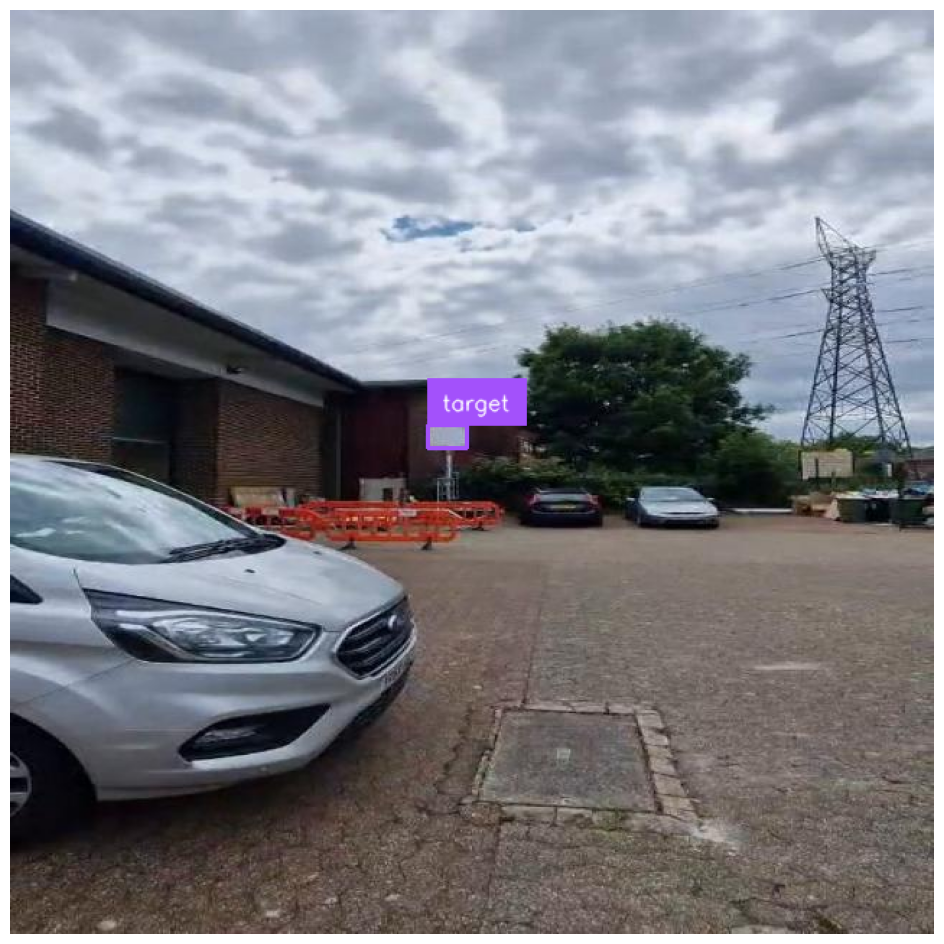

In [ ]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)


0: 640x384 1 target, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


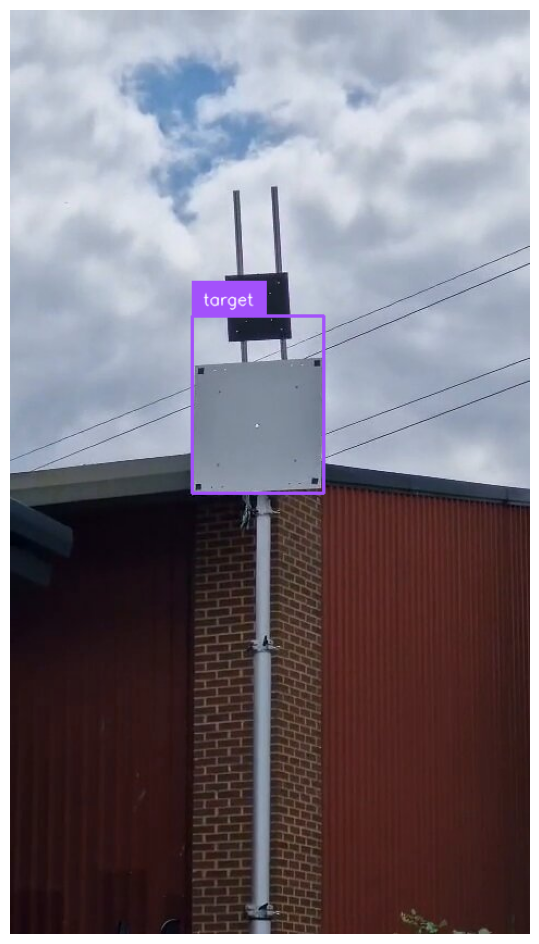

In [ ]:
from PIL import Image
import supervision as sv

# Specify the path to your image
image_path = '/content/video_3_032.jpg'

# Load the image
image = Image.open(image_path)

# Run the model on the image
results = model(source=image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

# Annotate the image with bounding boxes and labels
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# Plot the annotated image
sv.plot_image(annotated_image)
